# Part 1

Part 1 aims to show that assuming the mean reversion assumption, common filters have a low predictive power.

## Imports of libraries

In [35]:
from config import datafolder
from functions import *
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn

import warnings
warnings.filterwarnings("ignore")

## Performance of a specific filter on a specific dataset

In [64]:
# choosing a dataset of price relative, a filter and its parameters 
dataname = "SP500"  # among SP500, TSE, DJIA
dataset = pd.read_csv(datafolder+dataname+".csv") #price relative
f = KCA # filter you want
params = {"window": 5} # parameter you want

In [65]:
# build dataframe of price relative predictions
prediction = f(dataset,params).divide(to_absolute(dataset)) # build predictions

In [66]:
# adjusting the data to measure the performance
adjusted_dataset, adjusted_prediction = adjust_data(dataset, prediction, horizon=1) # adjust the matrix of true and predicted price relatives 

# measure of the performance
regression_report(adjusted_dataset, adjusted_prediction, output="all")

,MAE,DPA,R2
uniform_average,0.019380,0.502620,-0.337094
General Electric Company (273 Bil),0.017949,0.498824,-0.409514
Microsoft Corporation (259 Bil),0.021603,0.505882,-0.296288
"Wal-Mart Stores, (234 Bil)",0.019460,0.508235,-0.396405
Exxon Mobil Corporation (230 Bil),0.014342,0.521569,-0.614184
Pfizer Inc (194 Bil),0.018655,0.491765,-0.391748
Citigroup Inc. (192 Bil),0.021156,0.511373,-0.306587
Johnson & Johnson (170 Bil),0.014318,0.470588,-0.670445
American International Group (138 Bil),0.017421,0.499608,-0.447942
International Business Machines Corporation (136 Bil),0.019244,0.512157,-0.322305


## Parameter optimisation

In this section there is a template code to analyse impact of the change of a parameter.
The impact is observed over 3 datasets (DJIA, TSE, NYSE) and two metrics (Mean absolute error, Direction prediction accuracy).

You have to choose the filter and the parameter you want to test and its range. 
Note that the name has to be the exact name used for the filter.

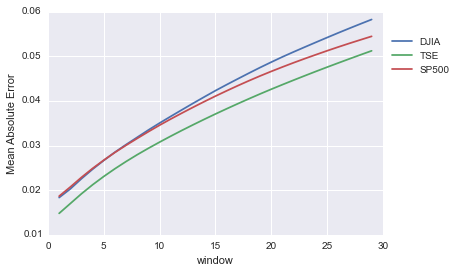

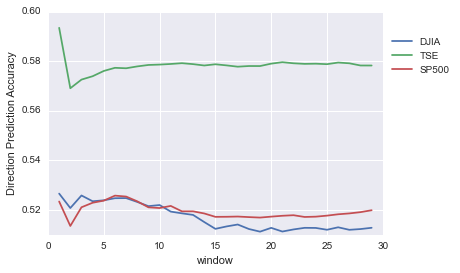

In [77]:
f = MA 
parameter_range = range(1,30)
parameter_name = "window"

for dataname in ["DJIA","TSE","SP500"] :
    dataset = pd.read_csv(datafolder+dataname+".csv") #price relative data
    MAE = []
    DPA = []
    for p in parameter_range:
        params[parameter_name] = p
        prediction = f(dataset,params).divide(to_absolute(dataset)) # build predictions
        adjusted_dataset, adjusted_prediction = adjust_data(dataset, prediction, horizon=1) # adjust the matrix of true and predicted price relatives 
        report = regression_report(adjusted_dataset, adjusted_prediction, output="average")
        
        MAE.append(report["MAE"])
        DPA.append(report["DPA"])

    plt.figure(1)
    plt.plot(parameter_range, MAE, label = dataname)
    
    plt.figure(2)
    plt.plot(parameter_range, DPA, label = dataname)

    
plt.figure(1)
plt.xlabel(parameter_name)
plt.ylabel("Mean Absolute Error")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

plt.figure(2)
plt.xlabel(parameter_name)
plt.ylabel("Direction Prediction Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

plt.show()

## Higher Horizon

## Walkforward optimisation